# Package import

In [19]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

# Parameters

In [20]:
valid_perc = 0.1

In [21]:
# For Fashion MNIST we need the list of class names to know what we are dealing with
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data Load

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
shape = X_train_full.shape
print("Shape: " + str(shape))

data_type = X_train_full.dtype
print("Data Type: "  + str(data_type))

Shape: (60000, 28, 28)
Data Type: uint8


In [24]:
class_names[y_train_full[1]]

'T-shirt/top'

# Data preparation

In [25]:
num_valid_items = round(valid_perc*X_train_full.shape[0])

In [26]:
X_valid, X_train = X_train_full[:num_valid_items] / 255.0, X_train_full[num_valid_items:] / 255.0
y_valid, y_train = y_train_full[:num_valid_items], y_train_full[num_valid_items:]

# Creating the model using the Sequential API

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [shape[1], shape[2]]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

# Training the model

In [12]:
# history = model.fit(X_train_full / 255.0, y_train, epochs = 30, validation_split = valid_perc)

In [13]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 4s 66us/sample - loss: 0.7286 - accuracy: 0.7621 - val_loss: 0.5342 - val_accuracy: 0.8160
Epoch 2/30
54000/54000 [==============================] - 3s 58us/sample - loss: 0.4877 - accuracy: 0.8303 - val_loss: 0.4554 - val_accuracy: 0.8465
Epoch 3/30
54000/54000 [==============================] - 3s 59us/sample - loss: 0.4434 - accuracy: 0.8444 - val_loss: 0.4248 - val_accuracy: 0.8563
Epoch 4/30
54000/54000 [==============================] - 3s 57us/sample - loss: 0.4152 - accuracy: 0.8532 - val_loss: 0.4136 - val_accuracy: 0.8590
Epoch 5/30
54000/54000 [==============================] - 3s 60us/sample - loss: 0.3956 - accuracy: 0.8609 - val_loss: 0.3896 - val_accuracy: 0.8618
Epoch 6/30
54000/54000 [==============================] - 3s 57us/sample - loss: 0.3790 - accuracy: 0.8658 - val_loss: 0.3779 - val_accuracy: 0.8645
Epoch 7/30
54000/54000 [==============================] -

# Results Analysis

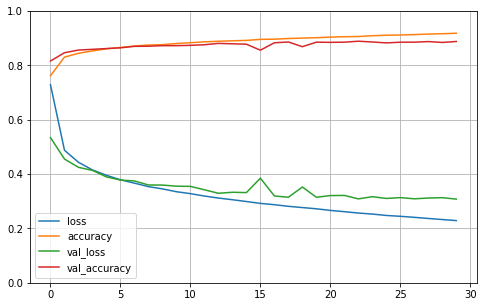

In [14]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [15]:
# Test data evaluation
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 58.1118 - accuracy: 0.8625


[58.111823854064944, 0.8625]

# Prediction

In [16]:
prediction_proba = model.predict_proba(X_test)

In [17]:
prediction = model.predict_classes(X_test)

In [18]:
print("Prediction for 3rd item: " + str(prediction[2]))
print("Actual 3rd item: " + str(y_test[2]))

Prediction for 3rd item: 1
Actual 3rd item: 1
